# Contents:
1.  [Import Necessary Libraries](#Import-Libraries)
2.  [Import Datasets](#Import-Datasets)
3.  [Data Analysis](#Data-Analysis)
4.  [Data Visualization](#Data-Visualization)
5.  [Cleaning Data](#Cleaning-Data)
6.  [Choosing the Best Model](#Choosing-Model)
7.  [Export Model](#Export-Model)
8.  [References](#References)

# Overview

## Data Dictionary
This table provides a description of the variables included in the dataset.

| Variable | Definition | Key |
| :----- | :----- | :----- |
| `survival` | Survival | `0` = No, `1` = Yes |
| `pclass` | Ticket class | `1` = 1st, `2` = 2nd, `3` = 3rd |
| `sex` | Sex | |
| `Age` | Age in years | |
| `sibsp` | \# of siblings / spouses aboard the Titanic | |
| `parch` | \# of parents / children aboard the Titanic | |
| `ticket` | Ticket number | |
| `fare` | Passenger fare | |
| `cabin` | Cabin number | |
| `embarked` | Port of Embarkation | `C` = Cherbourg, `Q` = Queenstown, `S` = Southampton |


## Dataset Variable Definitions

This document provides a detailed explanation of the variables present in the dataset. Understanding these variables is crucial for accurate analysis and interpretation of the data.

---

### Variable Notes

#### `pclass`
* **Description**: A proxy for socio-economic status (SES).
* **Values**:
    * `1st`: Upper Class
    * `2nd`: Middle Class
    * `3rd`: Lower Class

#### `age`
* **Description**: The age of the individual.
* **Notes**:
    * Age is fractional if less than 1 (e.g., for infants).
    * If the age is estimated, it is represented in the form of `xx.5` (e.g., `22.5`).

#### `sibsp`
* **Description**: Defines family relations within the dataset, specifically the number of siblings or spouses aboard.
* **Relations Included**:
    * **Sibling**: Brother, sister, stepbrother, stepsister
    * **Spouse**: Husband, wife (mistresses and fiancés were ignored for this variable)

#### `parch`
* **Description**: Defines family relations within the dataset, specifically the number of parents or children aboard.
* **Relations Included**:
    * **Parent**: Mother, father
    * **Child**: Daughter, son, stepdaughter, stepson
* **Notes**:
    * Some children traveled only with a nanny, and for them, `parch` is recorded as `0`.

---

### Usage
This README should be consulted when working with the dataset to ensure correct interpretation of the `pclass`, `age`, `sibsp`, and `parch` variables.

---

# Import-Libraries

In [3]:
# Data Analysis Library
import pandas as pd
import numpy as np

# Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [177]:
# Play with Model
from sklearn.model_selection import train_test_split

# Machine Learning Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Metrices
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Saved Model
import pickle
import os

[Top](#Contents:)

# Import-Datasets

In [5]:
#Import train and Test Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.shape, test.shape

((891, 12), (418, 11))

In [7]:
train.shape[0] / (train.shape[0]+test.shape[0])

0.680672268907563

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

[Top](#Contents:)

# Data-Analysis

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#print the columns name with it's data type
obj = train.select_dtypes(include = ['object']).columns.tolist()
intg = train.select_dtypes(include = ['int64']).columns.tolist()
flt = train.select_dtypes(include = ['float64']).columns.tolist()

print(f'Object Columns: {[x for x in obj]} --> Length: {len(obj)}')
print(f'Integer Columns: {intg} --> Length: {len(intg)}')
print(f'Float Columns: {flt} --> Length: {len(flt)}')

Object Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] --> Length: 5
Integer Columns: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'] --> Length: 5
Float Columns: ['Age', 'Fare'] --> Length: 2


In [14]:
print(*obj)

Name Sex Ticket Cabin Embarked


In [15]:
# Check Null Items
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Missing Value Counts

In [16]:
# Missing values of Age in Percentage
train['Age'].isnull().sum()/train['Age'].shape[0]

np.float64(0.19865319865319866)

In [17]:
# Missing values of Cabin in Percentage
train['Cabin'].isnull().sum()/train['Cabin'].shape[0]

np.float64(0.7710437710437711)

In [18]:
# Missing values of Embarked in Percentage
train['Embarked'].isnull().sum()/train['Embarked'].shape[0]

np.float64(0.002244668911335578)

## Observations
---
### Drop Columns:
    1. `PassengerId`
    2. `Name`

### Columns Convert
1. **Numarical Features:** `SibSp` (Discreate), `Parch` (Discreate), `Fare` (Continuos)
2. **Categorical Features:** `Pclass`, `Sex`, `Age`, `Embarked`, `Survived`
3. **Alphanumeric Features:** `Ticket`, `Cabin`

### Missing Values
1. **Age:** 19.8% (Fill)
2. **Cabin:** 77.1% (Remove)
3. **Embarked:** 0.22% (Fill)


---

[Top](#Contents:)

# Data-Visualization
It's Time to visualize this dataset according to survive type

In [19]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## `Pclass`
`Pclass` stands for different types of ticket classes 
```
1st: Upper Class
2nd: Middle Class
3rd: Lower Class
```

In [20]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### Total Survived Counts

In [21]:
survived_count1 = train["Survived"][train["Pclass"] == 1].value_counts()[1]
survived_count2 = train["Survived"][train["Pclass"] == 2].value_counts()[1]
survived_count3 = train["Survived"][train["Pclass"] == 3].value_counts()[1]

print(f'Class 1, Total Survived People: {survived_count1}')
print(f'Class 2, Total Survived People: {survived_count2}')
print(f'Class 3, Total Survived People: {survived_count3}')

Class 1, Total Survived People: 136
Class 2, Total Survived People: 87
Class 3, Total Survived People: 119


<Axes: >

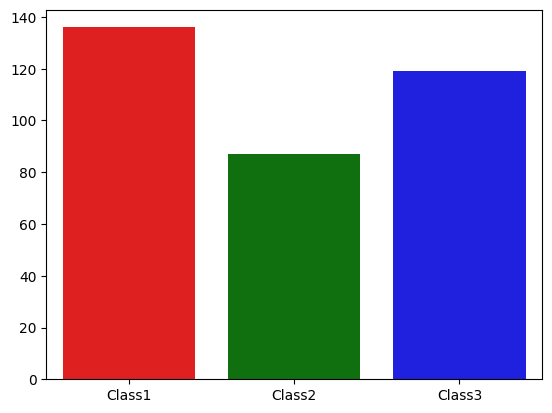

In [22]:
sns.barplot(
    x=['Class1', 'Class2', 'Class3'],
    y=[survived_count1, survived_count2, survived_count3],
    palette=['red', 'green', 'blue']
)

### Total Non Survived Counts

In [23]:
non_survived_count1 = train["Survived"][train["Pclass"] == 1].value_counts()[0]
non_survived_count2 = train["Survived"][train["Pclass"] == 2].value_counts()[0]
non_survived_count3 = train["Survived"][train["Pclass"] == 3].value_counts()[0]

print(f'Class 1, Total Survived People: {non_survived_count1}')
print(f'Class 2, Total Survived People: {non_survived_count2}')
print(f'Class 3, Total Survived People: {non_survived_count3}')

Class 1, Total Survived People: 80
Class 2, Total Survived People: 97
Class 3, Total Survived People: 372


<Axes: >

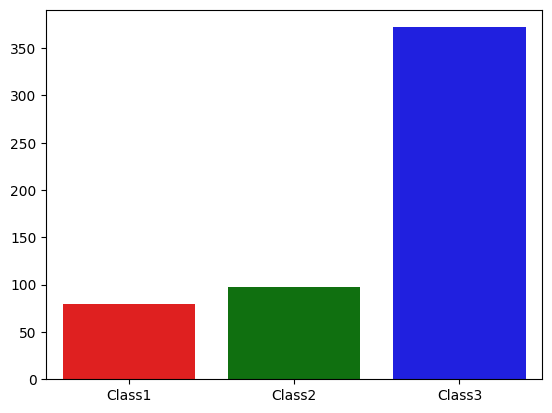

In [24]:
sns.barplot(
    x=['Class1', 'Class2', 'Class3'],
    y=[non_survived_count1, non_survived_count2, non_survived_count3],
    palette=['red', 'green', 'blue']
)

### Percentage of Survived People

In [25]:
class1 = train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100
class2 = train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100
class3 = train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100

print(f'Class 1, Survived Rate: {class1}%')
print(f'Class 2, Survived Rate: {class2}%')
print(f'Class 3, Survived Rate: {class3}%')

Class 1, Survived Rate: 62.96296296296296%
Class 2, Survived Rate: 47.28260869565217%
Class 3, Survived Rate: 24.236252545824847%


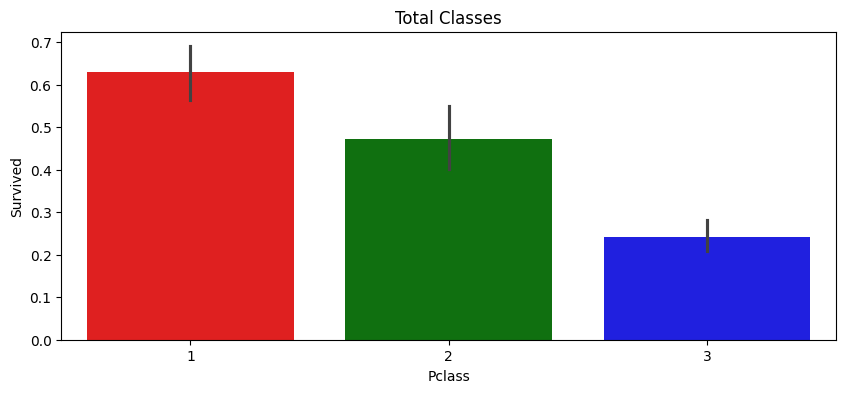

In [26]:
plt.figure(figsize=(10, 4))
sns.barplot(data=train, x='Pclass', y='Survived', palette=['red', 'green', 'blue'])
plt.title('Total Classes')
plt.show()

### Gender wise Survived in each class

<Axes: xlabel='Pclass', ylabel='Survived'>

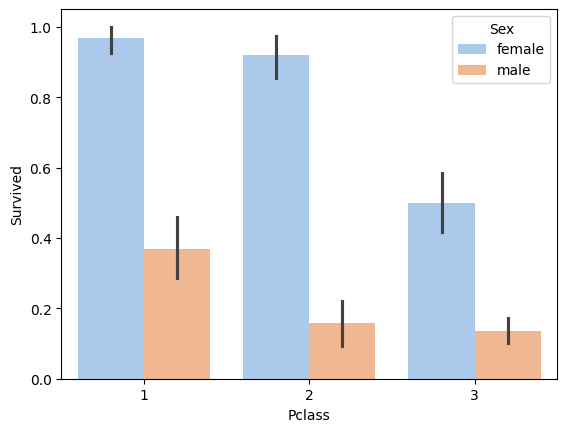

In [27]:
sns.barplot(data=train, x='Pclass', y='Survived', hue='Sex', palette='pastel')

## `SibSp`
* **Description**: Defines family relations within the dataset, specifically the number of siblings or spouses aboard.
* **Relations Included**:
    * **Sibling**: Brother, sister, stepbrother, stepsister
    * **Spouse**: Husband, wife (mistresses and fiancés were ignored for this variable)
* **-XD**:
    * 0 -> Single
    * 1 -> With 1 Person
    * ... -> ...
    * 8 -> with 8 person 

In [28]:
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

### Total Survived Count

In [29]:
sibsp_survived0 = train['Survived'][train['SibSp'] == 0].value_counts()[1]
sibsp_survived1 = train['Survived'][train['SibSp'] == 1].value_counts()[1]
sibsp_survived2 = train['Survived'][train['SibSp'] == 2].value_counts()[1]
sibsp_survived3 = train['Survived'][train['SibSp'] == 3].value_counts()[1]
sibsp_survived4 = train['Survived'][train['SibSp'] == 4].value_counts()[1]
# sibsp_survived5 = train['Survived'][train['SibSp'] == 5].value_counts()[1]
# sibsp_survived8 = train['Survived'][train['SibSp'] == 8].value_counts()[1]

sibsp_survived5 = 0 #All are dead
sibsp_survived8 = 0 #All are dead

print(f'Sibling/Spouse: 0, Total Survived: {sibsp_survived0}')
print(f'Sibling/Spouse: 1, Total Survived: {sibsp_survived1}')
print(f'Sibling/Spouse: 2, Total Survived: {sibsp_survived2}')
print(f'Sibling/Spouse: 3, Total Survived: {sibsp_survived3}')
print(f'Sibling/Spouse: 4, Total Survived: {sibsp_survived4}')
print(f'Sibling/Spouse: 5, Total Survived: {sibsp_survived5}')
print(f'Sibling/Spouse: 8, Total Survived: {sibsp_survived8}')

Sibling/Spouse: 0, Total Survived: 210
Sibling/Spouse: 1, Total Survived: 112
Sibling/Spouse: 2, Total Survived: 13
Sibling/Spouse: 3, Total Survived: 4
Sibling/Spouse: 4, Total Survived: 3
Sibling/Spouse: 5, Total Survived: 0
Sibling/Spouse: 8, Total Survived: 0


### Percentage of Survived Peoples

In [30]:
sibsp_survived_per0 = train['Survived'][train['SibSp'] == 0].value_counts(normalize = True)[1]*100
sibsp_survived_per1 = train['Survived'][train['SibSp'] == 1].value_counts(normalize = True)[1]*100
sibsp_survived_per2 = train['Survived'][train['SibSp'] == 2].value_counts(normalize = True)[1]*100
sibsp_survived_per3 = train['Survived'][train['SibSp'] == 3].value_counts(normalize = True)[1]*100
sibsp_survived_per4 = train['Survived'][train['SibSp'] == 4].value_counts(normalize = True)[1]*100
# sibsp_survived_per5 = train['Survived'][train['SibSp'] == 5].value_counts(normalize = True)[1]*100
# sibsp_survived_per8 = train['Survived'][train['SibSp'] == 8].value_counts(normalize = True)[1]*100
sibsp_survived_per5 = 0.0 #All are dead
sibsp_survived_per8 = 0.0 #All are dead

print(f'Sibling/Spouse: 0, Survived: {sibsp_survived_per0:.2f}%')
print(f'Sibling/Spouse: 1, Survived: {sibsp_survived_per1:.2f}%')
print(f'Sibling/Spouse: 2, Survived: {sibsp_survived_per2:.2f}%')
print(f'Sibling/Spouse: 3, Survived: {sibsp_survived_per3:.2f}%')
print(f'Sibling/Spouse: 4, Survived: {sibsp_survived_per4:.2f}%')
print(f'Sibling/Spouse: 5, Survived: {sibsp_survived_per5:.2f}%')
print(f'Sibling/Spouse: 8, Survived: {sibsp_survived_per8:.2f}%')

Sibling/Spouse: 0, Survived: 34.54%
Sibling/Spouse: 1, Survived: 53.59%
Sibling/Spouse: 2, Survived: 46.43%
Sibling/Spouse: 3, Survived: 25.00%
Sibling/Spouse: 4, Survived: 16.67%
Sibling/Spouse: 5, Survived: 0.00%
Sibling/Spouse: 8, Survived: 0.00%


### Genderwise total Survived

Text(0.5, 1.0, 'Total Sibling/Spouse according to Gender')

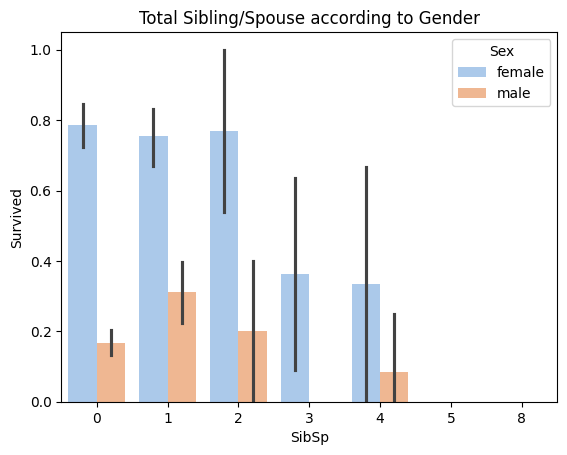

In [31]:
sns.barplot(x='SibSp', y='Survived', hue='Sex', data=train, palette='pastel')
plt.title('Total Sibling/Spouse according to Gender')

## `Parch`
* **Description**: Defines family relations within the dataset, specifically the number of parents or children aboard.
* **Relations Included**:
    * **Parent**: Mother, father
    * **Child**: Daughter, son, stepdaughter, stepson
* **Notes**:
    * Some children traveled only with a nanny, and for them, `parch` is recorded as `0`.
 
* **-XD**:
    * 0 -> Single
    * 1 -> Travel with 1 Parent&/Child
    * ... -> ... Parent/Child
    * 6 -> Travel with 6 Parent&/Child

In [32]:
train['Parch'].value_counts().unique

<bound method Series.unique of Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64>

### Total Survived Counts

In [33]:
total_parch_survived0 = train['Survived'][train['Parch'] == 0].value_counts()[1]
total_parch_survived1 = train['Survived'][train['Parch'] == 1].value_counts()[1]
total_parch_survived2 = train['Survived'][train['Parch'] == 2].value_counts()[1]
total_parch_survived3 = train['Survived'][train['Parch'] == 3].value_counts()[1]
# total_parch_survived4 = train['Survived'][train['Parch'] == 4].value_counts()[0]
total_parch_survived5 = train['Survived'][train['Parch'] == 5].value_counts()[1]
# total_parch_survived6 = train['Survived'][train['Parch'] == 6].value_counts()[0]

total_parch_survived4 = 0 # All are Dead
total_parch_survived6 = 0 # All are Dead 

print(f'Parents/Child Number: 0, Total Survived: {total_parch_survived0}')
print(f'Parents/Child Number: 1, Total Survived: {total_parch_survived1}')
print(f'Parents/Child Number: 2, Total Survived: {total_parch_survived2}')
print(f'Parents/Child Number: 3, Total Survived: {total_parch_survived3}')
print(f'Parents/Child Number: 4, Total Survived: {total_parch_survived4}')
print(f'Parents/Child Number: 5, Total Survived: {total_parch_survived5}')
print(f'Parents/Child Number: 6, Total Survived: {total_parch_survived6}')


Parents/Child Number: 0, Total Survived: 233
Parents/Child Number: 1, Total Survived: 65
Parents/Child Number: 2, Total Survived: 40
Parents/Child Number: 3, Total Survived: 3
Parents/Child Number: 4, Total Survived: 0
Parents/Child Number: 5, Total Survived: 1
Parents/Child Number: 6, Total Survived: 0


### Percentage of Survived People

In [34]:
parch_survived_per0 = train['Survived'][train['Parch'] == 0].value_counts(normalize = True)[1]*100
parch_survived_per1 = train['Survived'][train['Parch'] == 1].value_counts(normalize = True)[1]*100
parch_survived_per2 = train['Survived'][train['Parch'] == 2].value_counts(normalize = True)[1]*100
parch_survived_per3 = train['Survived'][train['Parch'] == 3].value_counts(normalize = True)[1]*100
# parch_survived_per4 = train['Survived'][train['Parch'] == 4].value_counts(normalize = True)[1]*100
parch_survived_per5 = train['Survived'][train['Parch'] == 5].value_counts(normalize = True)[1]*100
# parch_survived_per6 = train['Survived'][train['Parch'] == 6].value_counts(normalize = True)[1]*100

parch_survived_per4 = 0.0 #All are dead
parch_survived_per6 = 0.0 #All are dead

print(f'Parents/Child: 0, Survived: {parch_survived_per0:.2f}%')
print(f'Parents/Child: 1, Survived: {parch_survived_per1:.2f}%')
print(f'Parents/Child: 2, Survived: {parch_survived_per2:.2f}%')
print(f'Parents/Child: 3, Survived: {parch_survived_per3:.2f}%')
print(f'Parents/Child: 4, Survived: {parch_survived_per4:.2f}%')
print(f'Parents/Child: 5, Survived: {parch_survived_per5:.2f}%')
print(f'Parents/Child: 6, Survived: {parch_survived_per6:.2f}%')


Parents/Child: 0, Survived: 34.37%
Parents/Child: 1, Survived: 55.08%
Parents/Child: 2, Survived: 50.00%
Parents/Child: 3, Survived: 60.00%
Parents/Child: 4, Survived: 0.00%
Parents/Child: 5, Survived: 20.00%
Parents/Child: 6, Survived: 0.00%


### Gender wise Survived

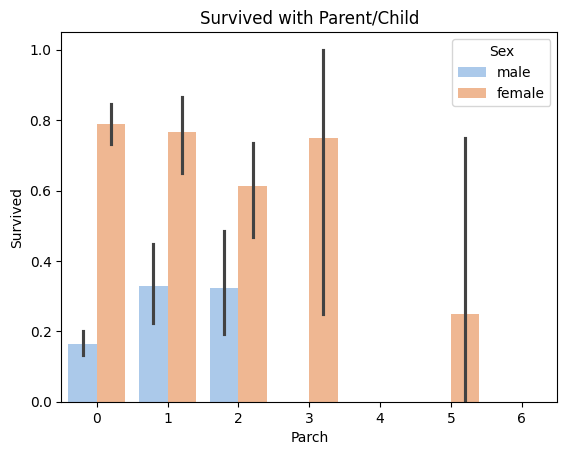

In [35]:
sns.barplot(x='Parch', y='Survived', hue='Sex', palette='pastel', data=train)
plt.title('Survived with Parent/Child')
plt.show()

## `Sex`

In [36]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

### Total Gender Survived

In [37]:
male_survived = train['Survived'][train['Sex'] == 'male'].value_counts()[1]
female_survived = train['Survived'][train['Sex'] == 'female'].value_counts()[1]

print(f'Total Male Survived: {male_survived}')
print(f'Total Female Survived: {female_survived}')

Total Male Survived: 109
Total Female Survived: 233


### Percentage of Gender Survived

In [38]:
male_survided_per = train['Survived'][train['Sex'] == 'male'].value_counts(normalize = True)[1]*100
female_survided_per = train['Survived'][train['Sex'] == 'female'].value_counts(normalize = True)[1]*100

print(f'Male Survived Percentage: {male_survided_per:.2f}%')
print(f'Female Survived Percentage: {female_survided_per:.2f}%')

Male Survived Percentage: 18.89%
Female Survived Percentage: 74.20%


### Gender wise Survived

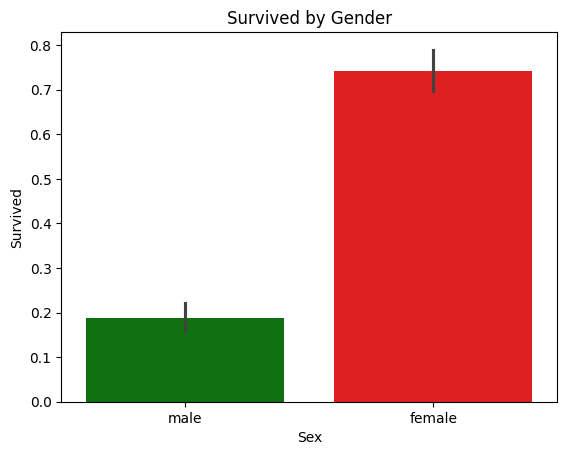

In [39]:
sns.barplot(x='Sex', y='Survived', palette = ['green', 'red'], data = train)
plt.title('Survived by Gender')
plt.show()

## `Cabin`

---

🛳️ What the "Cabin" Column Represents
- It indicates the **cabin number** assigned to a passenger aboard the Titanic.
- Example values: `"C85"`, `"E46"`, `"B28"`, or sometimes multiple cabins like `"C23 C25 C27"`.

---

⚠️ Key Characteristics
- **Highly missing data**: Over **77%** of the entries are missing (`NaN`), especially for 3rd class passengers.
- **Cabin codes** typically start with a **letter** (A–G), which refers to the **deck level**.
- The **number** following the letter may indicate the cabin's position on that deck.

---

🧠 How It's Used in Analysis
- Analysts often extract the **deck letter** (e.g., `Cabin.str[0]`) to study survival rates by deck.
- Some studies suggest passengers in **higher decks (A–C)** had better survival odds—possibly due to proximity to lifeboats.
- Due to the missing data, it's common to:
  - Treat it as a **categorical feature** (deck only)
  - Create a **binary feature** like `HasCabin = Cabin.notnull()`

---

Referenced by [Copilot AI](https://copilot.microsoft.com/)

### Total Person with Cabin or Not

In [40]:
without_cabin = train['Cabin'].isnull().sum()
with_cabin = train['Cabin'].notnull().sum()

print(f'Total Person With Cabin: {with_cabin}')
print(f'Total Person Without Cabin: {without_cabin}')

Total Person With Cabin: 204
Total Person Without Cabin: 687


### Total Cabin wise Survived

In [41]:
total_cabin_survived = train['Survived'][train['Cabin'].notnull()].value_counts()[1]
total_noncabin_survived = train['Survived'][train['Cabin'].isnull()].value_counts()[1]

print(f'Total Person Survived with Cabin: {total_cabin_survived}')
print(f'Total Person Survived without Cabin: {total_noncabin_survived}')

Total Person Survived with Cabin: 136
Total Person Survived without Cabin: 206


### Percentage of Cabin Survived

In [42]:
total_cabin_survived_per = train['Survived'][train['Cabin'].notnull()].value_counts(normalize=True)[1]
total_noncabin_survived_per = train['Survived'][train['Cabin'].isnull()].value_counts(normalize=True)[1]

print(f'Total Person Survived with Cabin: {total_cabin_survived_per:.2f}%')
print(f'Total Person Survived without Cabin: {total_noncabin_survived_per:.2f}%')

Total Person Survived with Cabin: 0.67%
Total Person Survived without Cabin: 0.30%


## `Age`
![age_image](assets/age_stage.JPG)

In [43]:
age_df = train.copy()
age_df['Age'].fillna(-1, inplace=True)
age_df['Age'].isnull().sum()

np.int64(0)

### Make Age Group
---
- We added `1` as an intermediate edge to separate `'Newborn'` (0–1 years) from `'Toddler'` (1–3 years).
- Now you have **10 bin edges**, which define **9 intervals**, perfectly matching your 9 labels.

---

In [44]:
bins = [-1, 0, 1, 3, 12, 19, 39, 59, 65, np.inf]
labels = ['Unknown', 'Newborn', 'Toddler', 'Child', 'Teenager', 'Young Adults', 'Middle Adults', 'Seniors', 'Centenarians']

train['Age_Group'] = pd.cut(
    x=train['Age'].fillna(-0.5),
    bins=bins,
    labels=labels,
    include_lowest=True
)

test['Age_Group'] = pd.cut(
    x=test['Age'].fillna(-0.5),
    bins=bins,
    labels=labels,
    include_lowest=True
)

### Total Survived Count of Age Group

In [45]:
total_age_survived_unkn = train['Survived'][train['Age_Group'] == 'Unknown'].value_counts()[1]
total_age_survived_new = train['Survived'][train['Age_Group'] == 'Newborn'].value_counts()[1]
total_age_survived_todd = train['Survived'][train['Age_Group'] == 'Toddler'].value_counts()[1]
total_age_survived_chi = train['Survived'][train['Age_Group'] == 'Child'].value_counts()[1]
total_age_survived_teen = train['Survived'][train['Age_Group'] == 'Teenager'].value_counts()[1]
total_age_survived_young = train['Survived'][train['Age_Group'] == 'Young Adults'].value_counts()[1]
total_age_survived_middle = train['Survived'][train['Age_Group'] == 'Middle Adults'].value_counts()[1]
total_age_survived_seniors = train['Survived'][train['Age_Group'] == 'Seniors'].value_counts()[1]
total_age_survived_centen = train['Survived'][train['Age_Group'] == 'Centenarians'].value_counts()[1]


print(f'Age Group: Unknown, Total Survived: {total_age_survived_unkn}')
print(f'Age Group: Newborn, Total Survived: {total_age_survived_new}')
print(f'Age Group: Toddler, Total Survived: {total_age_survived_todd}')
print(f'Age Group: Child, Total Survived: {total_age_survived_chi}')
print(f'Age Group: Teenager, Total Survived: {total_age_survived_teen}')
print(f'Age Group: Young Adults, Total Survived: {total_age_survived_young}')
print(f'Age Group: Middle Adults, Total Survived: {total_age_survived_middle}')
print(f'Age Group: Seniors, Total Survived: {total_age_survived_seniors}')
print(f'Age Group: Centenarians, Total Survived: {total_age_survived_centen}')


Age Group: Unknown, Total Survived: 52
Age Group: Newborn, Total Survived: 12
Age Group: Toddler, Total Survived: 8
Age Group: Child, Total Survived: 20
Age Group: Teenager, Total Survived: 39
Age Group: Young Adults, Total Survived: 150
Age Group: Middle Adults, Total Survived: 54
Age Group: Seniors, Total Survived: 6
Age Group: Centenarians, Total Survived: 1


### Percentage of Age Group Survived

In [46]:
per_age_survived_unkn = train['Survived'][train['Age_Group'] == 'Unknown'].value_counts(normalize=True)[1]*100
per_age_survived_new = train['Survived'][train['Age_Group'] == 'Newborn'].value_counts(normalize=True)[1]*100
per_age_survived_todd = train['Survived'][train['Age_Group'] == 'Toddler'].value_counts(normalize=True)[1]*100
per_age_survived_chi = train['Survived'][train['Age_Group'] == 'Child'].value_counts(normalize=True)[1]*100
per_age_survived_teen = train['Survived'][train['Age_Group'] == 'Teenager'].value_counts(normalize=True)[1]*100
per_age_survived_young = train['Survived'][train['Age_Group'] == 'Young Adults'].value_counts(normalize=True)[1]*100
per_age_survived_middle = train['Survived'][train['Age_Group'] == 'Middle Adults'].value_counts(normalize=True)[1]*100
per_age_survived_seniors = train['Survived'][train['Age_Group'] == 'Seniors'].value_counts(normalize=True)[1]*100
per_age_survived_centen = train['Survived'][train['Age_Group'] == 'Centenarians'].value_counts(normalize=True)[1]*100

print(f'Age Group: Unknown, Survival Rate: {per_age_survived_unkn:.2f}%')
print(f'Age Group: Newborn, Survival Rate: {per_age_survived_new:.2f}%')
print(f'Age Group: Toddler, Survival Rate: {per_age_survived_todd:.2f}%')
print(f'Age Group: Child, Survival Rate: {per_age_survived_chi:.2f}%')
print(f'Age Group: Teenager, Survival Rate: {per_age_survived_teen:.2f}%')
print(f'Age Group: Young Adults, Survival Rate: {per_age_survived_young:.2f}%')
print(f'Age Group: Middle Adults, Survival Rate: {per_age_survived_middle:.2f}%')
print(f'Age Group: Seniors, Survival Rate: {per_age_survived_seniors:.2f}%')
print(f'Age Group: Centenarians, Survival Rate: {per_age_survived_centen:.2f}%')

Age Group: Unknown, Survival Rate: 29.38%
Age Group: Newborn, Survival Rate: 85.71%
Age Group: Toddler, Survival Rate: 50.00%
Age Group: Child, Survival Rate: 51.28%
Age Group: Teenager, Survival Rate: 41.05%
Age Group: Young Adults, Survival Rate: 38.76%
Age Group: Middle Adults, Survival Rate: 39.42%
Age Group: Seniors, Survival Rate: 33.33%
Age Group: Centenarians, Survival Rate: 12.50%


### Visualize these Age

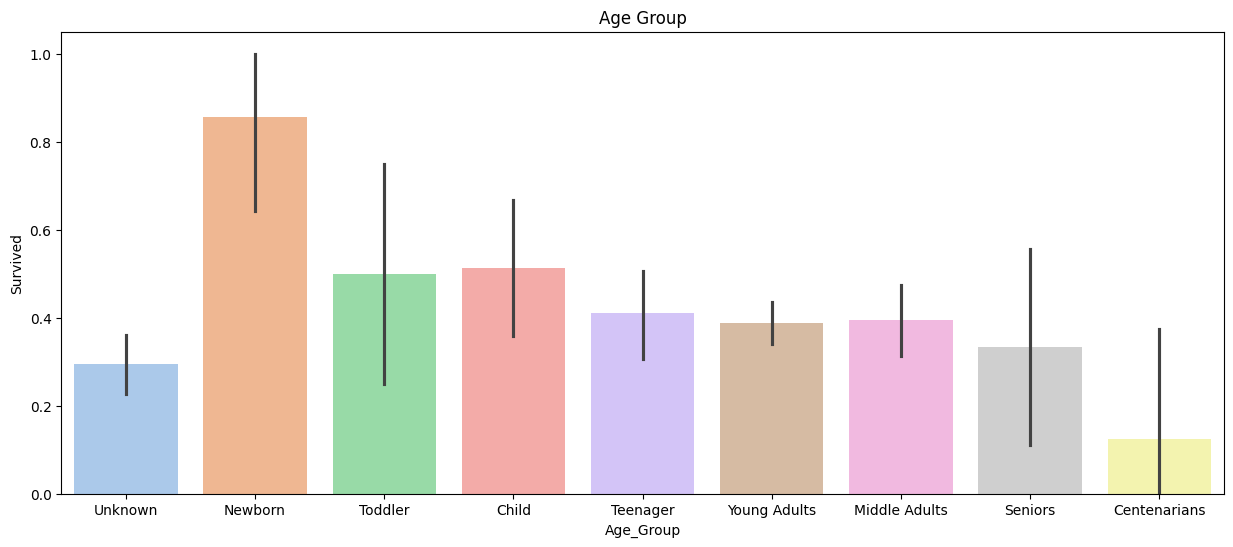

In [47]:
plt.figure(figsize=(15,6))
sns.barplot(x='Age_Group', y='Survived', data=train, palette='pastel')
plt.title('Age Group')
plt.show()

### Percentage According to Sex

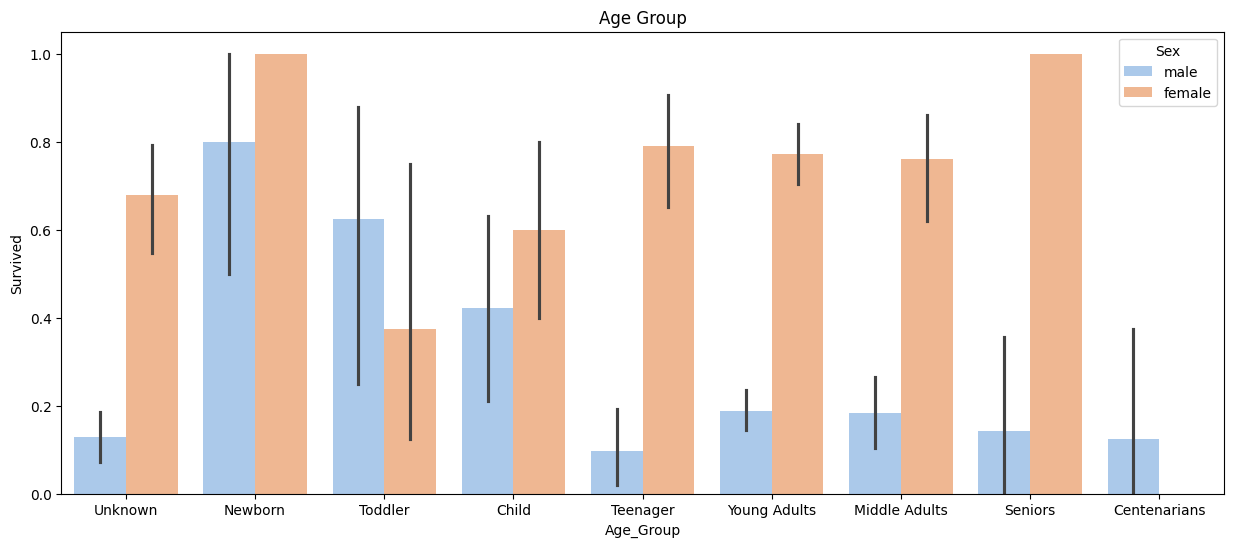

In [48]:
plt.figure(figsize=(15,6))
sns.barplot(x='Age_Group', y='Survived', data=train, hue='Sex', palette='pastel')
plt.title('Age Group')
plt.show()

[Top](#Contents:)

# Cleaning-Data

## Missing Value Impute

In [49]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_Group        0
dtype: int64

### `Embarked`

In [50]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


### `Cabin`

In [51]:
train['Cabin_Flag'] = train['Cabin'].notnull().astype(int)
test['Cabin_Flag'] = test['Cabin'].notnull().astype(int)
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Cabin_Flag
552,553,0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q,Unknown,0
592,593,0,3,"Elsbury, Mr. William James",male,47.0,0,0,A/5 3902,7.2500,NaN,S,Middle Adults,0
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S,Child,1


### `Age`

In [52]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [53]:
pd.crosstab(train['Title'], train['Sex']).index

Index(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major',
       'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],
      dtype='object', name='Title')

In [54]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(
        ['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev'],
        'Rare'
    )

    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms', 'Lady'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Sir', 'Mr')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.158301
3,Mrs,0.793651
4,Rare,0.285714


In [55]:
title_mapping = {
    'Mr' : 1,
    'Miss' : 2,
    'Mrs' : 3,
    'Master' : 4,
    'Rare' : 5
}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(5).astype('int64')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Cabin_Flag,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adults,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young Adults,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adults,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adults,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adults,0,1


In [56]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age_Group        0
Cabin_Flag       0
Title            0
dtype: int64

In [57]:
mr_age = train[train['Title'] == 1]['Age_Group'].mode()[0]
miss_age = train[train['Title'] == 2]['Age_Group'].mode()[0]
mrs_age = train[train['Title'] == 3]['Age_Group'].mode()[0]
master_age = train[train['Title'] == 4]['Age_Group'].mode()[0]
rare_age = train[train['Title'] == 5]['Age_Group'].mode()[0]

print(f"Title: Mr, Most Common Age Group: {mr_age}")
print(f"Title: Miss, Most Common Age Group: {miss_age}")
print(f"Title: Mrs, Most Common Age Group: {mrs_age}")
print(f"Title: Master, Most Common Age Group: {master_age}")
print(f"Title: Rare, Most Common Age Group: {rare_age}")

Title: Mr, Most Common Age Group: Young Adults
Title: Miss, Most Common Age Group: Young Adults
Title: Mrs, Most Common Age Group: Young Adults
Title: Master, Most Common Age Group: Child
Title: Rare, Most Common Age Group: Middle Adults


In [58]:
age_title_mapping = {1: "Young Adults", 2: "Young Adults", 3: "Young Adults", 4: "Child", 5: "Middle Adults"}
age_title_mapping[train["Title"][1]]

'Young Adults'

In [59]:
print(train['Age_Group'].cat.categories)

Index(['Unknown', 'Newborn', 'Toddler', 'Child', 'Teenager', 'Young Adults',
       'Middle Adults', 'Seniors', 'Centenarians'],
      dtype='object')


#### Generate by Bing AI

In [60]:
# Define the function to handle category addition and imputation
def fill_unknown_age_group(data, age_title_mapping):
    # Step 1: Get current and new categories
    existing_cats = set(data['Age_Group'].cat.categories)
    new_cats = set(age_title_mapping.values())
    cats_to_add = list(new_cats - existing_cats)

    # Step 2: Add missing categories
    if cats_to_add:
        data['Age_Group'] = data['Age_Group'].cat.add_categories(cats_to_add)

    # Step 3: Fill 'Unknown' using title-based mode mapping
    data.loc[data['Age_Group'] == 'Unknown', 'Age_Group'] = (
        data.loc[data['Age_Group'] == 'Unknown', 'Title'].map(age_title_mapping)
    )

# 🔄 Apply to both train and test
fill_unknown_age_group(train, age_title_mapping)
fill_unknown_age_group(test, age_title_mapping)


In [61]:
train['Age_Group'].unique()

['Young Adults', 'Middle Adults', 'Toddler', 'Teenager', 'Child', 'Centenarians', 'Seniors', 'Newborn']
Categories (9, object): ['Unknown' < 'Newborn' < 'Toddler' < 'Child' ... 'Young Adults' < 'Middle Adults' < 'Seniors' < 'Centenarians']

In [62]:
test['Age_Group'].unique()

['Young Adults', 'Middle Adults', 'Seniors', 'Teenager', 'Child', 'Centenarians', 'Toddler', 'Newborn']
Categories (9, object): ['Unknown' < 'Newborn' < 'Toddler' < 'Child' ... 'Young Adults' < 'Middle Adults' < 'Seniors' < 'Centenarians']

In [63]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Group',
       'Cabin_Flag', 'Title'],
      dtype='object')

In [64]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Group', 'Cabin_Flag',
       'Title'],
      dtype='object')

### `Fare`

In [65]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Age_Group        0
Cabin_Flag       0
Title            0
dtype: int64

In [66]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Cabin_Flag,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Seniors,0,1


In [67]:
train[train['Pclass']==3]['Fare'].mode()

0    8.05
Name: Fare, dtype: float64

In [68]:
test['Fare'].fillna(train[train['Pclass']==3]['Fare'].mode()[0], inplace=True)

In [69]:
test.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                         8.05
Cabin                         NaN
Embarked                        S
Age_Group                 Seniors
Cabin_Flag                      0
Title                           1
Name: 152, dtype: object

## Handling Categorical Feature

In [70]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Cabin_Flag,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adults,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young Adults,1,3


### `Sex`

In [71]:
sex_mapping = {'male' : 0, 'female' : 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [72]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Cabin_Flag,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adults,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Young Adults,1,3


### `Age_Group`

In [73]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Cabin_Flag,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,S,Young Adults,0,1


In [74]:
train['Age_Group'].unique()

['Young Adults', 'Middle Adults', 'Toddler', 'Teenager', 'Child', 'Centenarians', 'Seniors', 'Newborn']
Categories (9, object): ['Unknown' < 'Newborn' < 'Toddler' < 'Child' ... 'Young Adults' < 'Middle Adults' < 'Seniors' < 'Centenarians']

In [75]:
# labels = ['Newborn', 'Toddler', 'Child', 'Teenager', 'Young Adults', 'Middle Adults', 'Seniors', 'Centenarians']
age_mapping = {
    'Newborn' : 1,
    'Toddler' : 2,
    'Child' : 3,
    'Teenager' : 4,
    'Young Adults' : 5,
    'Middle Adults' : 6,
    'Seniors' : 7, 
    'Centenarians' : 8
}

train['Age_Group'] = train['Age_Group'].map(age_mapping).astype('int64')
test['Age_Group'] = test['Age_Group'].map(age_mapping).astype('int64')

In [76]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Cabin_Flag,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,S,5,0,1


### `Embarked`

In [77]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [78]:
embarked_mapping = {
    'S' : 0,
    'C' : 1, 
    'Q' : 2
}

train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)


In [79]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Cabin_Flag,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,5,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,5,1,3


## Features Construction

In [80]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Cabin_Flag,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,5,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,5,1,3


In [81]:
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

In [82]:
train['Family_Size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

#### Creating Family Group

In [83]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Cabin_Flag,Title,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,5,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,5,1,3,2


In [84]:
def family_group(size):
    if size == 1:
        return 'Solo'
    elif size <= 3:
        return 'Small'
    elif size <= 6:
        return 'Medium'
    else:
        return 'Large'

train['Family_Group'] = train['Family_Size'].apply(family_group)
test['Family_Group'] = test['Family_Size'].apply(family_group)


In [85]:
family_mapping = {
    'Solo' : 0,
    'Small' : 1,
    'Medium' : 2,
    'Large' : 3
}

train['Family_Group'] = train['Family_Group'].map(family_mapping)
test['Family_Group'] = test['Family_Group'].map(family_mapping)

In [86]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Cabin_Flag,Title,Family_Size,Family_Group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,5,0,1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,5,1,3,2,1


## Features Selection

---

🧩 Common Features in the Titanic Dataset
These are the original or engineered features often considered:

| Feature         | Description                                      | Type         |
|----------------|--------------------------------------------------|--------------|
| `Pclass`        | Passenger class (1st, 2nd, 3rd)                  | Ordinal      |
| `Sex`           | Gender                                           | Categorical  |
| `Age`           | Age in years                                     | Numerical    |
| `SibSp`         | # of siblings/spouses aboard                     | Numerical    |
| `Parch`         | # of parents/children aboard                     | Numerical    |
| `Fare`          | Ticket fare                                      | Numerical    |
| `Embarked`      | Port of embarkation (C, Q, S)                    | Categorical  |
| `Cabin`         | Cabin number (often missing)                     | Categorical  |
| `Title`         | Extracted from Name (e.g., Mr, Miss, Dr)         | Categorical  |
| `Age_Group`     | Binned age categories                            | Categorical  |
| `FamilySize`    | SibSp + Parch + 1                                | Numerical    |
| `IsAlone`       | Binary flag if passenger is alone                | Binary       |
| `Cabin_Flag`    | Binary flag for known/missing cabin              | Binary       |

---

🔍 Feature Selection Techniques
Here are some popular methods used to select the most relevant features:

1. **Filter Methods**
- Use statistical tests like **Chi-Square**, **ANOVA**, or **correlation** to rank features.
- Example: `SelectKBest` from `sklearn.feature_selection`.

2. **Wrapper Methods**
- Use model performance to evaluate subsets of features.
- Techniques: **Forward Selection**, **Backward Elimination**, **Recursive Feature Elimination (RFE)**.

3. **Embedded Methods**
- Feature selection is built into the model.
- Examples:
  - **Lasso Regression** (L1 regularization)
  - **Tree-based models** (e.g., Random Forest, XGBoost) using `.feature_importances_`

---

🌟 Commonly Selected Features for Titanic
Based on various Kaggle notebooks and studies, these features often rank high in importance:
- `Pclass`
- `Sex`
- `Fare`
- `Title`
- `Age` or `Age_Group`
- `IsAlone`
- `FamilySize`

---

By [Bing AI](https://copilot.microsoft.com/chats/)

In [87]:
train.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Cabin_Flag,Title,Family_Size,Family_Group
592,593,0,3,"Elsbury, Mr. William James",0,47.0,0,0,A/5 3902,7.25,NaN,0,6,0,1,1,0
284,285,0,1,"Smith, Mr. Richard William",0,NaN,0,0,113056,26.00,A19,0,5,1,1,1,0


In [88]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Group', 'Cabin_Flag',
       'Title', 'Family_Size', 'Family_Group'],
      dtype='object')

### Drop Columns

In [89]:
drop_col = ['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Title', 'Family_Size']
train.drop(drop_col, axis=1, inplace=True)
test.drop(drop_col, axis=1, inplace=True)

In [90]:
train.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_Group,Cabin_Flag,Family_Group
0,0,3,0,7.2500,0,5,0,1
1,1,1,1,71.2833,1,5,1,1
2,1,3,1,7.9250,0,5,0,0
3,1,1,1,53.1000,0,5,1,1
4,0,3,0,8.0500,0,5,0,0


## Handle the Outliers

✅ Option A: **Cap (Winsorize) the Outliers**\
✅ Option B: **Log Transformation**\
✅ Option C: **Binning**

---
🧠 **Bonus Tip**\
If you're using tree-based models (like Random Forest or XGBoost), they’re generally robust to outliers. But for linear models or distance-based algorithms (like KNN), handling outliers is crucial.

In [91]:
dataset['Fare'].describe()

count    418.000000
mean      35.561214
std       55.856789
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

### IQR = Q3-Q1

In [92]:
Q1 = dataset['Fare'].quantile(0.25)
Q3 = dataset['Fare'].quantile(0.75)
IQR = Q3-Q1
IQR

np.float64(23.576075)

### Min-MAX Values

In [93]:
min_val = Q1-(1.5*IQR)
max_val = Q3+(1.5*IQR)

min_val, max_val

(np.float64(-27.468312499999996), np.float64(66.8359875))

### Barplot

<Axes: ylabel='Fare'>

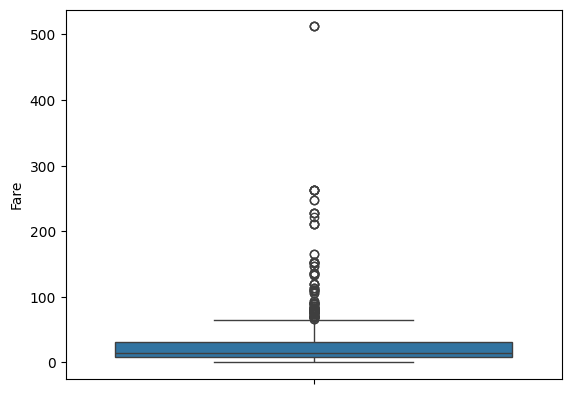

In [94]:
sns.boxplot(train['Fare'])

In [95]:
train[train['Fare'] > max_val]

,Survived,Pclass,Sex,Fare,Embarked,Age_Group,Cabin_Flag,Family_Group
1,1,1,1,71.2833,1,5,1,1
27,0,1,0,263.0000,0,4,1,2
31,1,1,1,146.5208,1,5,1,1
34,0,1,0,82.1708,1,5,0,1
52,1,1,1,76.7292,1,6,1,1
...,...,...,...,...,...,...,...,...
846,0,3,0,69.5500,0,5,0,3
849,1,1,1,89.1042,1,5,1,1
856,1,1,1,164.8667,0,6,0,1
863,0,3,1,69.5500,0,5,0,3


## Transformation

In [96]:
train['Fare'] = np.log1p(train['Fare'])
test['Fare'] = np.log1p(test['Fare'])

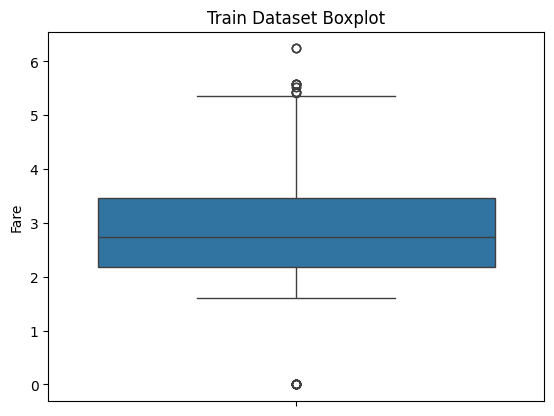

In [97]:
sns.boxplot(train['Fare'])
plt.title('Train Dataset Boxplot')
plt.show()

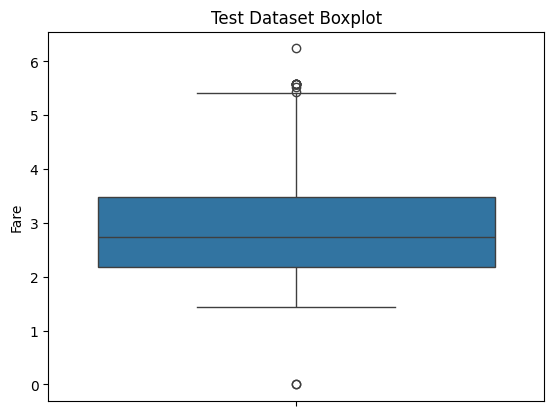

In [98]:
sns.boxplot(test['Fare'])
plt.title('Test Dataset Boxplot')
plt.show()

In [99]:
train.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_Group,Cabin_Flag,Family_Group
0,0,3,0,2.110213,0,5,0,1
1,1,1,1,4.280593,1,5,1,1
2,1,3,1,2.188856,0,5,0,0
3,1,1,1,3.990834,0,5,1,1
4,0,3,0,2.202765,0,5,0,0


In [100]:
test.head()

,Pclass,Sex,Fare,Embarked,Age_Group,Cabin_Flag,Family_Group
0,3,0,2.178064,2,5,0,0
1,3,1,2.079442,0,6,0,1
2,2,0,2.369075,2,7,0,0
3,3,0,2.268252,0,5,0,0
4,3,1,2.586824,0,5,0,1


[Top](#Contents:)

## Imbalance Dataset Check

In [101]:
train['Survived'].value_counts(normalize=True)*100


Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

# Choosing-Model
---

🧪 **Baseline Models**
These are great for quick benchmarks:

- **Logistic Regression** – Interpretable and effective for binary classification
- **K-Nearest Neighbors (KNN)** – Simple and intuitive, but sensitive to feature scaling
- **Naive Bayes** – Fast and works well with categorical features

---
🌳 **Tree-Based Models**
These often perform very well on Titanic:

- **Decision Tree** – Easy to visualize and interpret
- **Random Forest** – Ensemble of decision trees; reduces overfitting
- **Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)** – Powerful and often top performers in competitions

---
🧠 **Advanced Models**
For deeper experimentation:

- **Support Vector Machine (SVM)** – Good for high-dimensional spaces
- **Neural Networks (MLPClassifier from scikit-learn or Keras)** – Can capture complex patterns
- **Stacking or Voting Classifiers** – Combine multiple models for better performance

---
 🧰 Bonus Tools
- **Feature Selection**: Use `SelectKBest`, `RFE`, or model-based importance
- **Hyperparameter Tuning**: Try `GridSearchCV` or `RandomizedSearchCV` to optimize performance

---

By [Bing AI](https://copilot.microsoft.com/chats/)

## Train Test Split

In [102]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
X_train.shape, y_train.shape

((712, 7), (712,))

## ROC-AUC

In [105]:
def plot_roc_auc(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_proba)
    print("ROC AUC Score:", auc_score)

    # Plotting the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


## Logistic Regression

In [106]:
model1 = LogisticRegression(
    max_iter = 1000,
    # class_weight='balanced'
)

model1.fit(X_train, y_train)
model1_pred = model1.predict(X_test)
accuracy_score(y_test, model1_pred)

0.8212290502793296

### Confusion Matrix

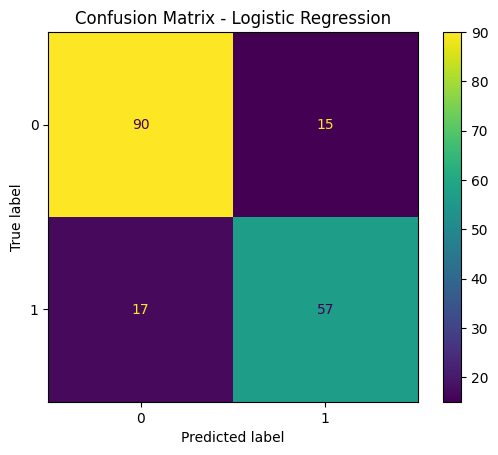

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test, model1_pred)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### Classification Report

In [108]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, model1_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### ROC AUC Score

ROC AUC Score: 0.9008365508365509


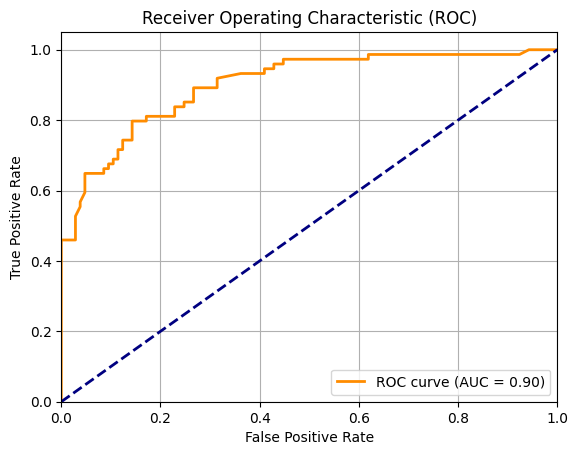

In [109]:
# Print ROC AUC Score
plot_roc_auc(model1, X_test, y_test)

## K-Nearest Neighbors (KNN)

In [110]:
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
model2_pred = model2.predict(X_test)
accuracy_score(y_test, model2_pred)

0.8044692737430168

### Confusion Matrix

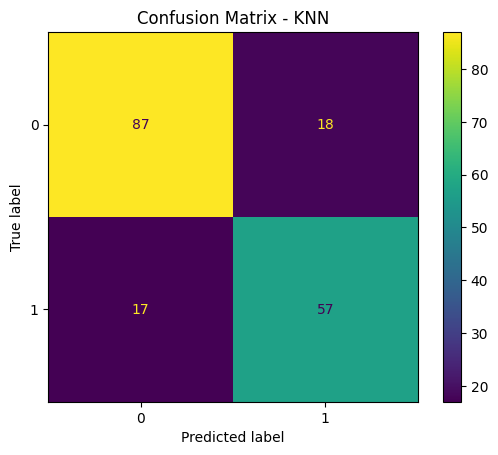

In [111]:
ConfusionMatrixDisplay.from_predictions(y_test, model2_pred)
plt.title("Confusion Matrix - KNN")
plt.show()

### Classification Report

In [112]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, model2_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       105
           1       0.76      0.77      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



### ROC AUC Score

ROC AUC Score: 0.8472972972972974


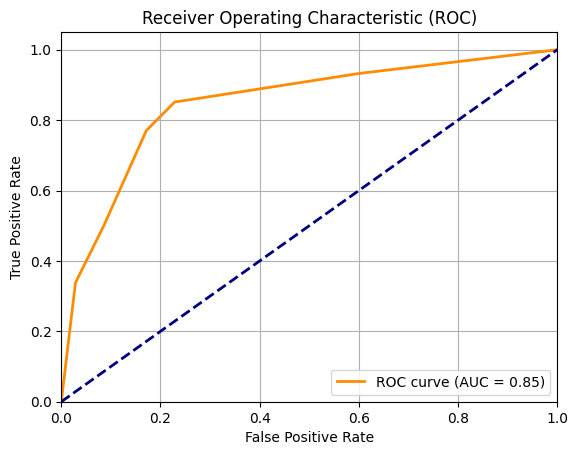

In [113]:
plot_roc_auc(model2, X_test, y_test)

## Naive Bayes

In [114]:
model3 = GaussianNB()
model3.fit(X_train, y_train)
model3_pred = model3.predict(X_test)
accuracy_score(y_test, model3_pred)

0.776536312849162

### Confusion Matrix

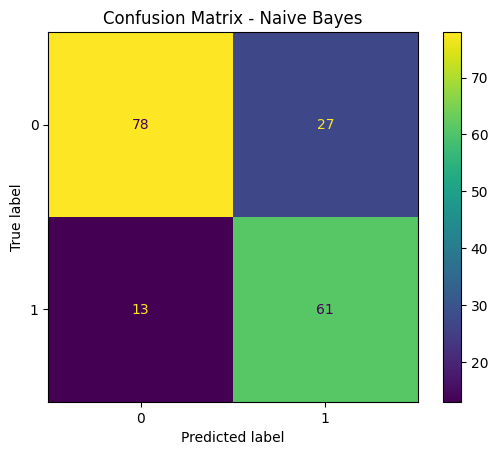

In [115]:
ConfusionMatrixDisplay.from_predictions(y_test, model3_pred)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

### Classification Report

In [116]:
print("Classification Report:")
print(classification_report(y_test, model3_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       105
           1       0.69      0.82      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



### ROC-AUC Score

ROC AUC Score: 0.8617117117117117


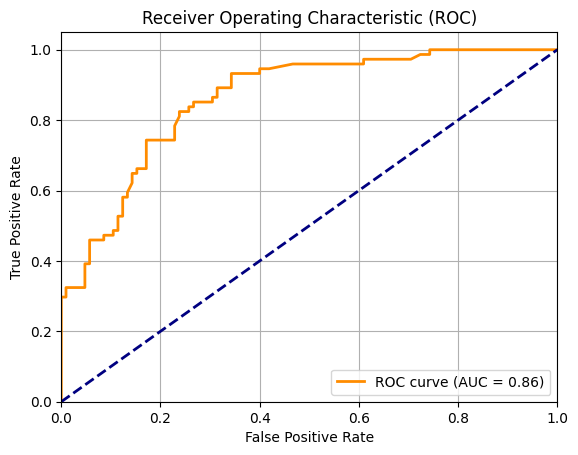

In [117]:
plot_roc_auc(model3, X_test, y_test)

## Decision Tree

In [118]:
model4 = DecisionTreeClassifier(
    criterion='entropy',
    splitter='random',
    max_depth=8,
)

model4.fit(X_train, y_train)
model4_pred = model4.predict(X_test)
accuracy_score(y_test, model4_pred)

0.8268156424581006

### Confusion Matrix

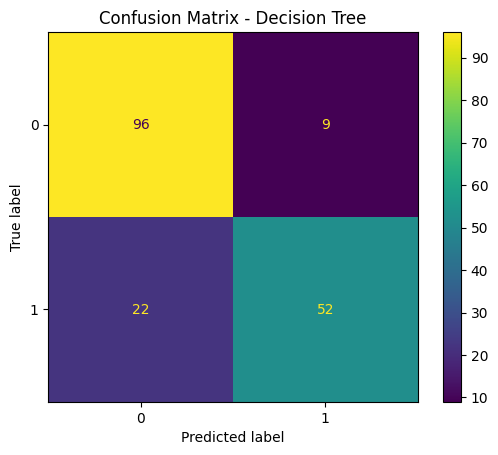

In [119]:
ConfusionMatrixDisplay.from_predictions(y_test, model4_pred)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

### Classification Report

In [120]:
print("Classification Report:")
print(classification_report(y_test, model4_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.70      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



### ROC-AUC Score

ROC AUC Score: 0.8851351351351352


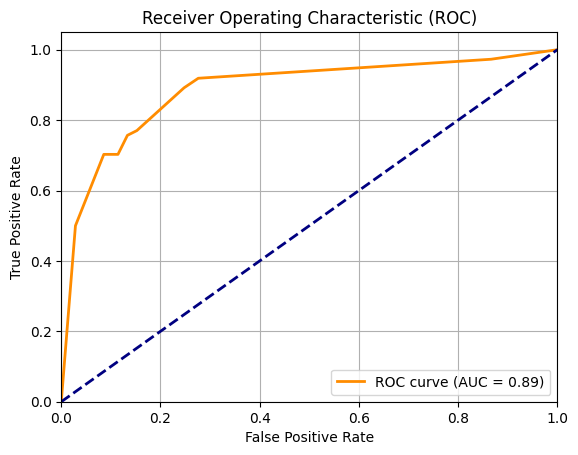

In [121]:
plot_roc_auc(model4, X_test, y_test)

## Random Forest

In [122]:
model5 = RandomForestClassifier(
    n_estimators=1000,
    criterion='gini',
    max_depth=8,
    bootstrap=True,
    oob_score=False,
)

model5.fit(X_train, y_train)
model5_pred = model5.predict(X_test)
accuracy_score(y_test, model5_pred)

0.8379888268156425

### Confusion Matrix

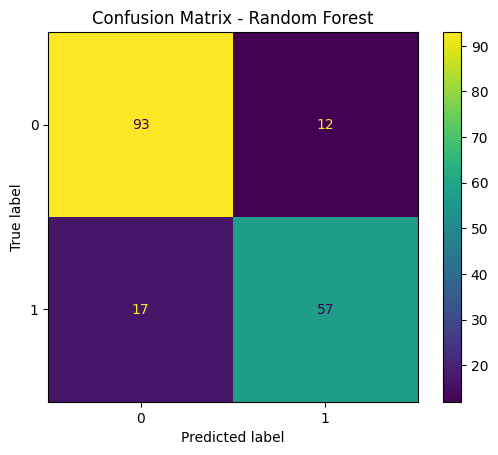

In [123]:
ConfusionMatrixDisplay.from_predictions(y_test, model5_pred)
plt.title("Confusion Matrix - Random Forest")
plt.show()

### Classification Report

In [124]:
print("Classification Report:")
print(classification_report(y_test, model5_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



### ROC-AUC Score

ROC AUC Score: 0.8976190476190475


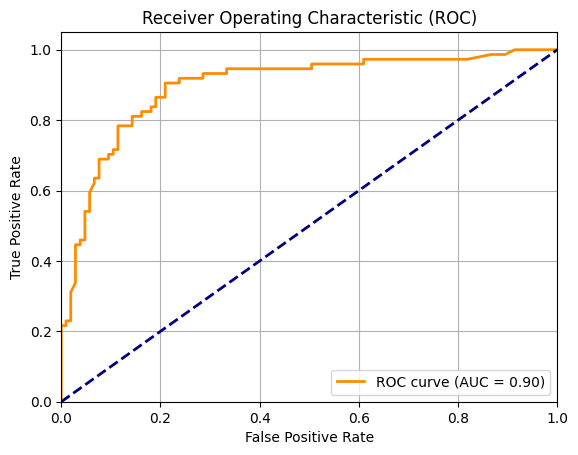

In [125]:
plot_roc_auc(model5, X_test, y_test)

## Gradient Boosting

In [126]:
model6 = GradientBoostingClassifier(
    # n_estimators=1000, 
    # subsample=0.75, 
    criterion='friedman_mse'
)

model6.fit(X_train, y_train)
model6_pred = model6.predict(X_test)
accuracy_score(y_test, model6_pred)

0.8212290502793296

### Confusion Matrix

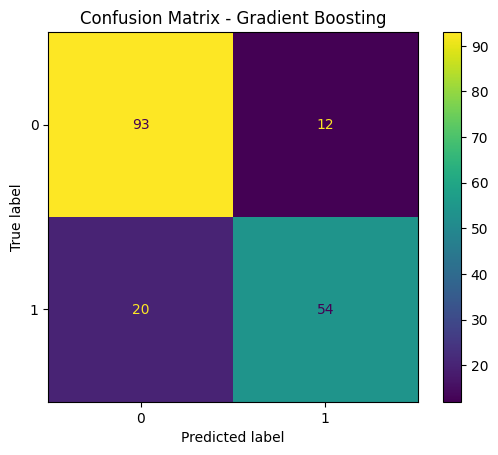

In [127]:
ConfusionMatrixDisplay.from_predictions(y_test, model6_pred)
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

### Classification Report

In [128]:
print("Classification Report:")
print(classification_report(y_test, model6_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### ROC-AUC Score

ROC AUC Score: 0.901930501930502


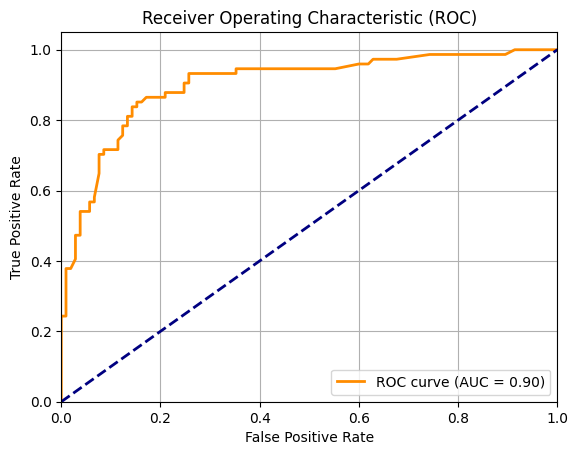

In [129]:
plot_roc_auc(model6, X_test, y_test)

## Support Vector Machine

In [130]:
model7 = SVC(probability=True)

model7.fit(X_train, y_train)
model7_pred = model6.predict(X_test)
accuracy_score(y_test, model7_pred)

0.8212290502793296

### Confusion Matrix

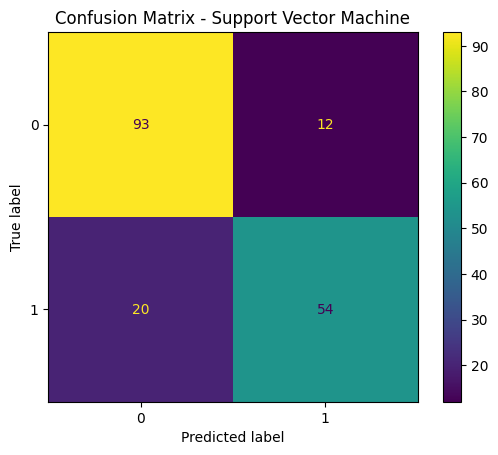

In [131]:
ConfusionMatrixDisplay.from_predictions(y_test, model7_pred)
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

### Classification Report

In [132]:
print("Classification Report:")
print(classification_report(y_test, model7_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### ROC-AUC Score

ROC AUC Score: 0.8906692406692407


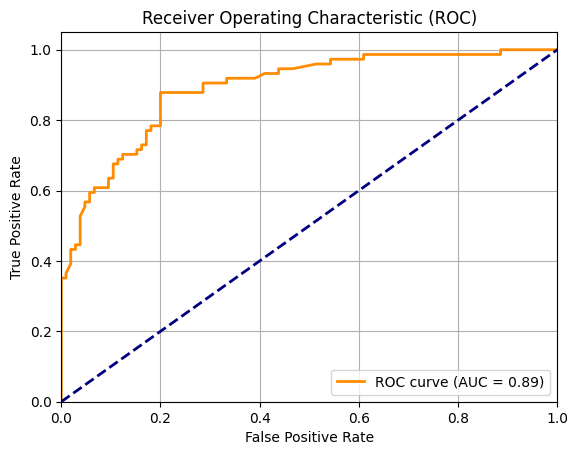

In [133]:
plot_roc_auc(model7, X_test, y_test)

## Neural Networks - MLPClassifier

In [134]:
model8 = MLPClassifier(hidden_layer_sizes=(32,64,32), max_iter=1000, random_state=42)
model8.fit(X_train, y_train)
model8_pred = model8.predict(X_test)
accuracy_score(y_test, model8_pred)

0.8435754189944135

### Confusion Matrix

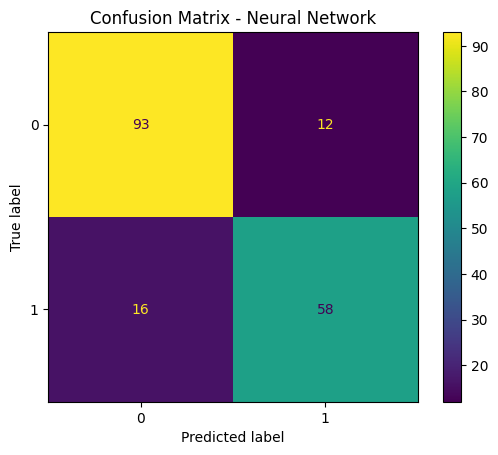

In [135]:
ConfusionMatrixDisplay.from_predictions(y_test, model8_pred)
plt.title("Confusion Matrix - Neural Network")
plt.show()

### Classification Report

In [136]:
print("Classification Report:")
print(classification_report(y_test, model8_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.78      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



### ROC-AUC Score

ROC AUC Score: 0.8978764478764478


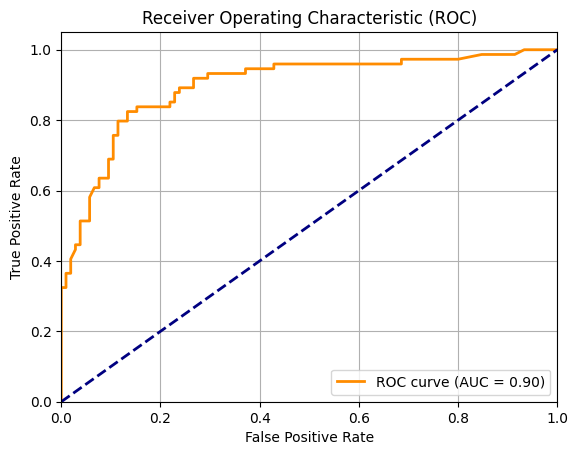

In [137]:
plot_roc_auc(model8, X_test, y_test)

## Stacking

In [138]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier()
clf4 = RandomForestClassifier()

In [139]:
estimators = [('Model1_LR', clf1), ('Model2_DT', clf2), ('Model3_KNN', clf3), ('Model4_RF', clf4)]

In [140]:
model9 = StackingClassifier(
    estimators = estimators,
    final_estimator=clf4,
    cv = 5
)

model9.fit(X_train, y_train)
model9_pred = model9.predict(X_test)
accuracy_score(y_test, model9_pred)

0.8603351955307262

### Confusion Matrix

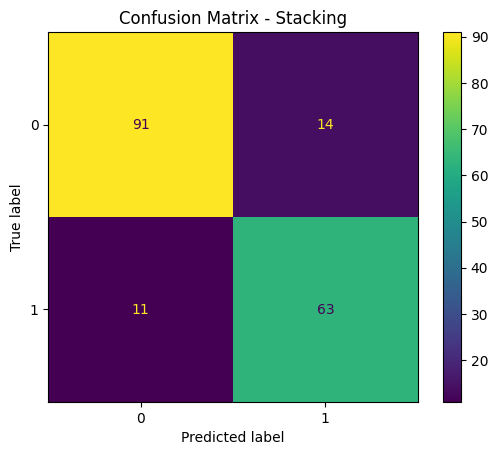

In [141]:
ConfusionMatrixDisplay.from_predictions(y_test, model9_pred)
plt.title("Confusion Matrix - Stacking")
plt.show()

### Classification Report

In [142]:
print("Classification Report:")
print(classification_report(y_test, model9_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       105
           1       0.82      0.85      0.83        74

    accuracy                           0.86       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.86      0.86      0.86       179



### ROC-AUC Score

ROC AUC Score: 0.8893178893178892


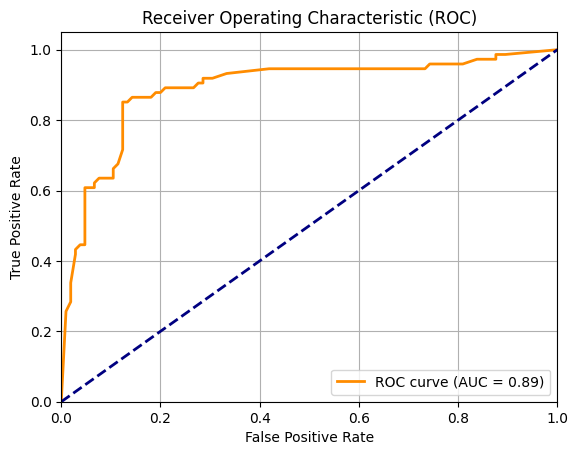

In [143]:
plot_roc_auc(model9, X_test, y_test)

## Models Selection

In [147]:
model_list = [
    accuracy_score(y_test, model1_pred),
    accuracy_score(y_test, model2_pred),
    accuracy_score(y_test, model3_pred),
    accuracy_score(y_test, model4_pred),
    accuracy_score(y_test, model5_pred),
    accuracy_score(y_test, model6_pred),
    accuracy_score(y_test, model7_pred),
    accuracy_score(y_test, model8_pred),
    accuracy_score(y_test, model9_pred),
]

In [149]:
model_name = [
    'Logistic Regression',
    'KNN',
    'Naive Bayes',
    'Decision Tree',
    'Random Forest',
    'Gradient Boosting',
    'SVM',
    'Neural Network',
    'Stacking'
]

In [165]:
model_var = [
    'model1',
    'model2',
    'model3',
    'model4',
    'model5',
    'model6',
    'model7',
    'model8',
    'model9'
]

In [171]:
accuracy_formatted = [round(acc, 4)*100 for acc in model_list]
temp = {
    'Model' : model_var,
    'Name' : model_name,
    'Accuracy' : accuracy_formatted
}

model_df = pd.DataFrame(temp)

In [172]:
model_df

,Model,Name,Accuracy
0,model1,Logistic Regression,82.12
1,model2,KNN,80.45
2,model3,Naive Bayes,77.65
3,model4,Decision Tree,82.68
4,model5,Random Forest,83.80
5,model6,Gradient Boosting,82.12
6,model7,SVM,82.12
7,model8,Neural Network,84.36
8,model9,Stacking,86.03


In [173]:
model_df.sort_values(by='Accuracy', ascending=False)

,Model,Name,Accuracy
8,model9,Stacking,86.03
7,model8,Neural Network,84.36
4,model5,Random Forest,83.80
3,model4,Decision Tree,82.68
0,model1,Logistic Regression,82.12
6,model7,SVM,82.12
5,model6,Gradient Boosting,82.12
1,model2,KNN,80.45
2,model3,Naive Bayes,77.65


### Observation

**Model Performance At A Glance 🚀**

**Top Insights ✨**
- Stacking (Model 9) leads the pack with an impressive `86.03%` Accuracy and a solid `0.86` F1 Score. It's your most accurate model!
- Neural Network (Model 8) is a strong runner-up, hitting `84.36%` Accuracy and `0.84` F1 Score.
- Random Forest (Model 5) also shines with `83.80%` Accuracy and `0.84` F1 Score.

**What to Consider Next 🤔**
- Accuracy isn't everything! Think about Precision, Recall, and F1 Score, especially for imbalanced data.
- Simpler models (like Logistic Regression or Decision Trees) are easier to understand, even if slightly less accurate.
- Watch out for Overfitting: Gradient Boosting (Model 7) showed a notable gap between training and test accuracy.

**In short:** Stacking (Model 9) is my accuracy Champion🏆

[Top](#Contents:)

# Export-Model

In [178]:
# Define the folder and file path
output_folder = 'saved_models'
model_filename = 'Titanic_Survived_Model.pkl' # .pkl is a common extension for pickled files
full_path = os.path.join(output_folder, model_filename)

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Created folder: {output_folder}")

# Save the model
try:
    with open(full_path, 'wb') as file: # 'wb' means write in binary mode
        pickle.dump(model9, file)
    print(f"Model successfully saved to: {full_path}")
except Exception as e:
    print(f"Error saving model: {e}")

Created folder: saved_models
Model successfully saved to: saved_models\Titanic_Survived_Model.pkl


[Top](#Contents:)

# References



- **Dataset** : 
https://www.kaggle.com/c/titanic/data?select=train.csv

- **Code** : 
https://www.kaggle.com/code/nadintamer/titanic-survival-predictions-beginner#7)-Creating-Submission-File

[Top](#Contents:)